# Loading the Dataset #

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/yash9939/Crop_Recomendation_System/refs/heads/main/Dataset/Crop%20recommendation%20dataset.csv")

df.head()

,CROPS,TYPE_OF_CROP,SOIL,SEASON,SOWN,HARVESTED,WATER_SOURCE,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,...,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
0,rice,cereals,Alluvial soil,kharif,Jun,Sep,irrigated,7.6,8.0,116.9,...,2462.3,2500,73.8,80,82.4,100,40.7,60,42.2,60
1,rice,cereals,Loamy soil,kharif,Jul,Oct,rainfed,6.2,8.0,117.9,...,1237.5,2500,60.9,80,90.5,100,51.3,60,46.2,60
2,rice,cereals,Clay soil,kharif,Jun,Sep,irrigated,6.7,8.0,117.7,...,1075.1,2500,67.5,80,86.2,100,50.7,60,44.4,60
3,rice,cereals,Alluvial soil,kharif,Jul,Oct,rainfed,6.1,8.0,149.8,...,1549.9,2500,73.6,80,91.3,100,51.3,60,44.5,60
4,rice,cereals,Loamy soil,kharif,Jun,Sep,irrigated,8.0,8.0,131.7,...,1306.4,2500,60.3,80,81.3,100,48.6,60,51.0,60


In [29]:
df = df.sample(frac=1)


In [30]:
df.head()

,CROPS,TYPE_OF_CROP,SOIL,SEASON,SOWN,HARVESTED,WATER_SOURCE,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,...,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
25788,sugarbeet,sugar crops,clay Loamy soil,kharif,Jun,Sep,irrigated,6.7,8.0,152.7,...,635.0,800,69.1,80,101.4,150,75.3,80,63.0,80
22481,cotton,fibre crop,Red soil,kharif,Jul,Oct,rainfed,7.4,8.0,135.2,...,1198.6,1300,87.7,90,89.8,120,52.3,60,50.5,60
54487,elephant foot yam,Root&tuber,rich red Loamy soil,rabi,Nov,May,rainfed,6.6,7.0,240.0,...,1412.4,1500,84.4,85,84.1,100,44.8,60,49.7,60
12662,greengram,pulses,Sandy soil,rabi,Dec,Jun,irrigated,7.3,7.5,100.0,...,969.2,1000,63.7,70,34.6,40,28.3,40,28.7,40
31008,brinjal,vegetables,Loamy soil,Zaid,Jun,Jun,irrigated,6.6,7.5,146.2,...,1048.4,1200,90.0,90,148.7,150,72.3,80,83.5,120


In [31]:
print(f"Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}")

Number of Rows: 57000
Number of Columns: 23


In [32]:
def details(data):
    features = []
    count = []
    duplicates = []
    missing  = []
    modes = []
    duplicate_percentage = []
    missing_percentage = []
    dtype = []
    for i in data.columns:
        features.append(i)
        count.append(data[i].count())
        duplicates.append(data.duplicated(subset=[i]).sum())
        missing.append(data[i].isnull().sum())
        modes.append(data[i].mode()[0])
        duplicate_percentage.append(f"{(data.duplicated(subset=[i]).sum())/data.shape[0]*100:.2f} %")
        missing_percentage.append(f"{(data[i].isnull().sum())/data.shape[0]*100:.2f} %")
        dtype.append(data[i].dtype)

    dataFrame = pd.DataFrame({'Features/Columns' : features,
                              'Count' : count,
                              'Missing' : missing,
                              'Duplicates' : duplicates,
                              'Mode' : modes,
                              'Duplicate Percentage' : duplicate_percentage,
                              'Missing Percentage' : missing_percentage,
                              'Data Type' : dtype})
    return dataFrame

In [33]:
details(df)

,Features/Columns,Count,Missing,Duplicates,Mode,Duplicate Percentage,Missing Percentage,Data Type
0,CROPS,57000,0,56943,Cabbage,99.90 %,0.00 %,object
1,TYPE_OF_CROP,57000,0,56990,vegetables,99.98 %,0.00 %,object
2,SOIL,57000,0,56966,sandy Loamy soil,99.94 %,0.00 %,object
3,SEASON,57000,0,56997,Zaid,99.99 %,0.00 %,object
4,SOWN,57000,0,56992,Jul,99.99 %,0.00 %,object
5,HARVESTED,57000,0,56993,Apr,99.99 %,0.00 %,object
6,WATER_SOURCE,57000,0,56998,irrigated,100.00 %,0.00 %,object
7,SOIL_PH,57000,0,56959,6.6,99.93 %,0.00 %,float64
8,SOIL_PH_HIGH,57000,0,56989,7.0,99.98 %,0.00 %,float64
9,CROPDURATION,57000,0,54731,120.0,96.02 %,0.00 %,float64


In [34]:
df.describe()

,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,CROPDURATION_MAX,TEMP,MAX_TEMP,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
count,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000
mean,6.624367,7.245614,109.347488,117.736842,24.757740,30.385965,887.262882,1038.596491,71.197588,76.421053,81.284277,98.947368,48.197891,60.526316,56.605086,69.122807
std,0.649972,0.609310,52.931444,54.934103,5.862506,6.354373,356.326523,438.103562,23.158554,23.860877,33.786202,37.542549,17.160902,19.414494,27.438288,30.681465
min,5.000000,6.000000,21.000000,21.000000,5.000000,18.000000,330.000000,350.000000,15.000000,18.000000,20.000000,40.000000,20.000000,30.000000,20.000000,30.000000
25%,6.200000,6.800000,75.900000,90.000000,21.100000,27.000000,604.600000,750.000000,64.400000,70.000000,56.600000,80.000000,34.975000,40.000000,34.900000,40.000000
50%,6.600000,7.000000,99.900000,105.000000,24.800000,30.000000,929.500000,1000.000000,78.200000,85.000000,80.500000,100.000000,47.700000,60.000000,50.500000,60.000000
75%,7.000000,7.500000,120.500000,140.000000,28.000000,35.000000,1070.100000,1200.000000,85.300000,90.000000,100.800000,120.000000,58.000000,80.000000,75.400000,100.000000
max,9.000000,9.000000,330.000000,330.000000,47.000000,47.000000,2499.800000,2500.000000,100.000000,100.000000,199.900000,200.000000,100.000000,100.000000,149.900000,150.000000


In [35]:
for col in df.select_dtypes(include='object').columns:
  print(f"{col} : {df[col].nunique()}\n{df[col].unique()}\n")

CROPS : 57
['sugarbeet' 'cotton' 'elephant foot yam' 'greengram' 'brinjal' 'chillies'
 'watermelon' 'sugarcane' 'radish' 'muskmelon' 'peas' 'tomato'
 'ribbed gourd' 'carrot' 'redgram' 'Pearl millet' 'wheat' 'cucumber'
 'tapoica' 'sunflower' 'beetroot' 'ragi' 'sweet potato' 'horsegram'
 'castor' 'sorghum' 'rice' 'pumpkin' 'french bean' 'jute'
 'vegetable cowpea' 'onion' 'Cabbage' 'small onion' 'maize' 'bhendi'
 'thinai' 'ash gourd' 'cowpea' 'chowchow' 'bottle gourd' 'soyabean'
 'samai' 'cauliflower' 'blackgram' 'capsicum' 'panivaragu' 'kudiraivali'
 'tinda' 'groundnut' 'cluster bean' 'snake gourd' 'bitter gourd' 'varagu'
 'gingely' 'annual moringa' 'bengalgram']

TYPE_OF_CROP : 10
['sugar crops' 'fibre crop' 'Root&tuber' 'pulses' 'vegetables' 'millets'
 'cereals' 'oil seeds' 'colecrops' 'bulbvegetables']

SOIL : 34
['clay Loamy soil ' 'Red soil' 'rich red Loamy soil' 'Sandy soil'
 'Loamy soil' 'clay Loamy soil' 'Alluvial soil' 'sandy Loamy soil'
 'Black Soil' 'loamy\xa0soil' 'well-drain

In [36]:
def strip_data(data):
  for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.strip()
  return data

In [37]:
df = strip_data(df)

In [38]:
mapping = {
    "colecrops":"cole crops",
    "Root&tuber":"Tuberous root",
    "bulbvegetables":"bulb vegetables"
}

df.TYPE_OF_CROP = df.TYPE_OF_CROP.replace(mapping)
df.TYPE_OF_CROP.unique()

array(['sugar crops', 'fibre crop', 'Tuberous root', 'pulses',
       'vegetables', 'millets', 'cereals', 'oil seeds', 'cole crops',
       'bulb vegetables'], dtype=object)

In [39]:
def correct_soil(s):
  if "\xa0" in s:
    s = s.replace("\xa0","")
  return s

In [40]:
df.SOIL = df.SOIL.apply(lambda x: correct_soil(x))
df.SOIL.unique()

array(['clay Loamy soil', 'Red soil', 'rich red Loamy soil', 'Sandy soil',
       'Loamy soil', 'Alluvial soil', 'sandy Loamy soil', 'Black Soil',
       'loamysoil', 'well-drained soil', 'red lateritic Loamy soil',
       'light Loamy soil', 'friable soil', 'light soi', 'Clay soil',
       'well-drained loamysoil', 'Laterite soil', 'deep soil',
       'black cotton soil', 'Sandysoil', 'salty clay Loamy soil',
       'sandy clay Loamy soil', 'sandy loamysoil',
       'well-grained deep loamy moist soil', 'brown Loamy soil',
       'heavy soil', 'silty Loamy soil', 'heavy Black Soil',
       'red Loamy soil', 'medium Black Soil', 'cottonsoil',
       'shallow Black Soil'], dtype=object)

In [41]:
mapping = {
    "Sandysoil":"Sandy Soil",
    "loamysoil":"loamy soil",
    "light soi":"light soil",
    "well-drained loamysoil":"well-drained loamy soil",
    "cottonsoil":"cotton soil",
    "sandy loamysoil":"sandy loamy soil"
}

df.SOIL = df.SOIL.replace(mapping)
df.SOIL.unique()

array(['clay Loamy soil', 'Red soil', 'rich red Loamy soil', 'Sandy soil',
       'Loamy soil', 'Alluvial soil', 'sandy Loamy soil', 'Black Soil',
       'loamy soil', 'well-drained soil', 'red lateritic Loamy soil',
       'light Loamy soil', 'friable soil', 'light soil', 'Clay soil',
       'well-drained loamy soil', 'Laterite soil', 'deep soil',
       'black cotton soil', 'Sandy Soil', 'salty clay Loamy soil',
       'sandy clay Loamy soil', 'sandy loamy soil',
       'well-grained deep loamy moist soil', 'brown Loamy soil',
       'heavy soil', 'silty Loamy soil', 'heavy Black Soil',
       'red Loamy soil', 'medium Black Soil', 'cotton soil',
       'shallow Black Soil'], dtype=object)

In [42]:
def capitalize(data):
  for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.capitalize()
  return data

df = capitalize(df)

for col in df.select_dtypes(include='object').columns:
  print(f"{col} : {df[col].nunique()}\n{df[col].unique()}\n")

CROPS : 57
['Sugarbeet' 'Cotton' 'Elephant foot yam' 'Greengram' 'Brinjal' 'Chillies'
 'Watermelon' 'Sugarcane' 'Radish' 'Muskmelon' 'Peas' 'Tomato'
 'Ribbed gourd' 'Carrot' 'Redgram' 'Pearl millet' 'Wheat' 'Cucumber'
 'Tapoica' 'Sunflower' 'Beetroot' 'Ragi' 'Sweet potato' 'Horsegram'
 'Castor' 'Sorghum' 'Rice' 'Pumpkin' 'French bean' 'Jute'
 'Vegetable cowpea' 'Onion' 'Cabbage' 'Small onion' 'Maize' 'Bhendi'
 'Thinai' 'Ash gourd' 'Cowpea' 'Chowchow' 'Bottle gourd' 'Soyabean'
 'Samai' 'Cauliflower' 'Blackgram' 'Capsicum' 'Panivaragu' 'Kudiraivali'
 'Tinda' 'Groundnut' 'Cluster bean' 'Snake gourd' 'Bitter gourd' 'Varagu'
 'Gingely' 'Annual moringa' 'Bengalgram']

TYPE_OF_CROP : 10
['Sugar crops' 'Fibre crop' 'Tuberous root' 'Pulses' 'Vegetables'
 'Millets' 'Cereals' 'Oil seeds' 'Cole crops' 'Bulb vegetables']

SOIL : 29
['Clay loamy soil' 'Red soil' 'Rich red loamy soil' 'Sandy soil'
 'Loamy soil' 'Alluvial soil' 'Sandy loamy soil' 'Black soil'
 'Well-drained soil' 'Red lateritic loamy 

In [53]:
df

,CROPS,TYPE_OF_CROP,SOIL,SEASON,SOWN,HARVESTED,WATER_SOURCE,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,...,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
25788,Sugarbeet,Sugar crops,Clay loamy soil,Kharif,Jun,Sep,Irrigated,6.7,8.0,152.7,...,635.0,800,69.1,80,101.4,150,75.3,80,63.0,80
22481,Cotton,Fibre crop,Red soil,Kharif,Jul,Oct,Rainfed,7.4,8.0,135.2,...,1198.6,1300,87.7,90,89.8,120,52.3,60,50.5,60
54487,Elephant foot yam,Tuberous root,Rich red loamy soil,Rabi,Nov,May,Rainfed,6.6,7.0,240.0,...,1412.4,1500,84.4,85,84.1,100,44.8,60,49.7,60
12662,Greengram,Pulses,Sandy soil,Rabi,Dec,Jun,Irrigated,7.3,7.5,100.0,...,969.2,1000,63.7,70,34.6,40,28.3,40,28.7,40
31008,Brinjal,Vegetables,Loamy soil,Zaid,Jun,Jun,Irrigated,6.6,7.5,146.2,...,1048.4,1200,90.0,90,148.7,150,72.3,80,83.5,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29888,Cabbage,Cole crops,Sandy loamy soil,Zaid,Jun,Jun,Irrigated,6.1,6.5,165.6,...,458.0,500,93.8,100,120.7,150,61.8,100,89.6,120
30793,Bhendi,Vegetables,Laterite soil,Zaid,Jun,Jun,Rainfed,6.2,6.8,61.5,...,2189.0,2200,98.6,100,146.9,150,61.4,100,106.5,120
8411,Thinai,Millets,Loamy soil,Kharif,Jul,Oct,Rainfed,6.7,7.0,89.1,...,870.1,900,17.4,20,35.2,40,27.8,30,24.4,30
2954,Maize,Millets,Red soil,Kharif,Jun,Sep,Irrigated,6.1,7.0,108.7,...,703.9,800,80.1,85,150.4,180,88.6,90,85.9,90


# EDA

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\3069587735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df.SOIL, order = df.SOIL.value_counts().index, palette="bright", alpha=0.8)


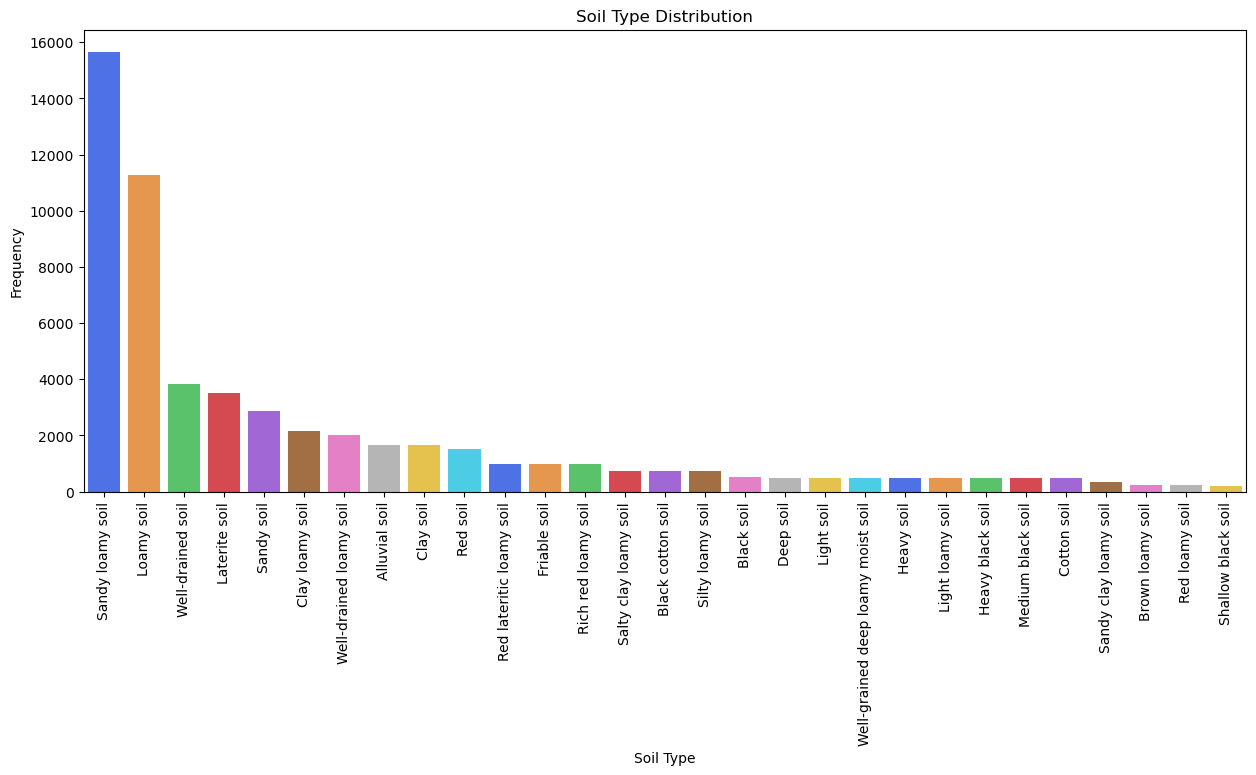

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(x = df.SOIL, order = df.SOIL.value_counts().index, palette="bright", alpha=0.8)
plt.xticks(rotation=90)
plt.title("Soil Type Distribution")
plt.xlabel("Soil Type")
plt.ylabel("Frequency")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\1250837546.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_crop_duration.index, y=avg_crop_duration.values, palette="bright")


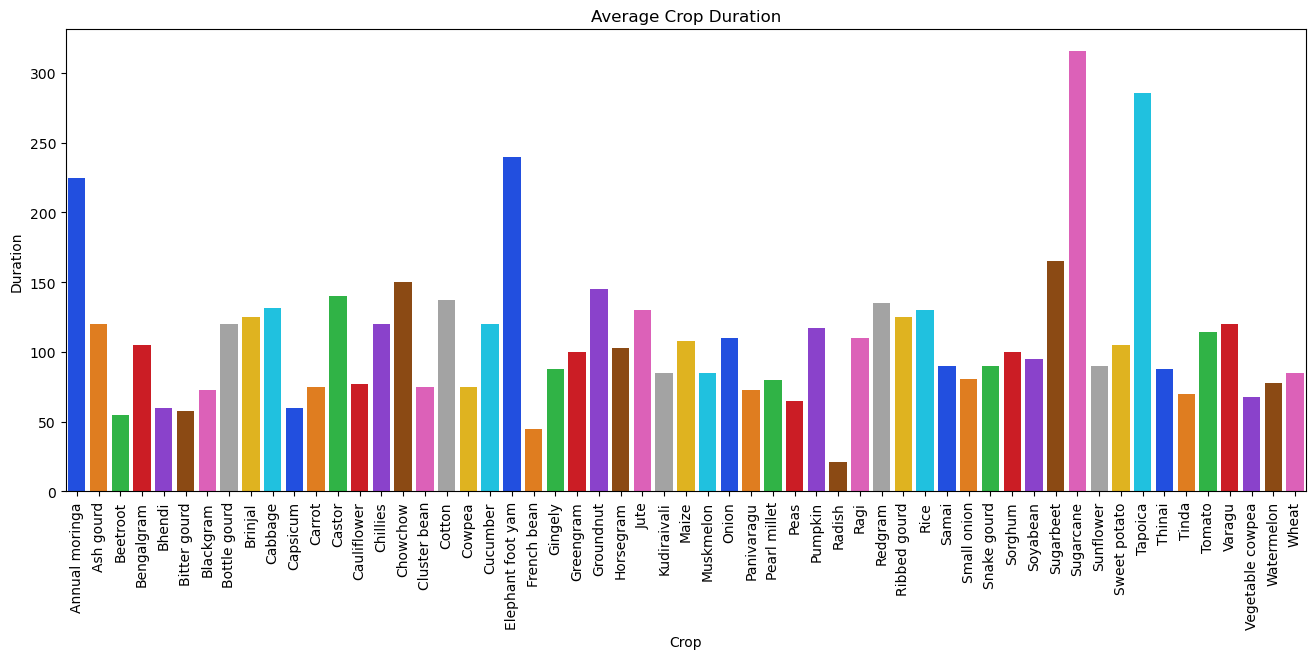

In [44]:
avg_crop_duration = df.groupby("CROPS")["CROPDURATION"].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_crop_duration.index, y=avg_crop_duration.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Crop Duration")
plt.xlabel("Crop")
plt.ylabel("Duration")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\4128388300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_temp.index, y=avg_temp.values, palette="bright")


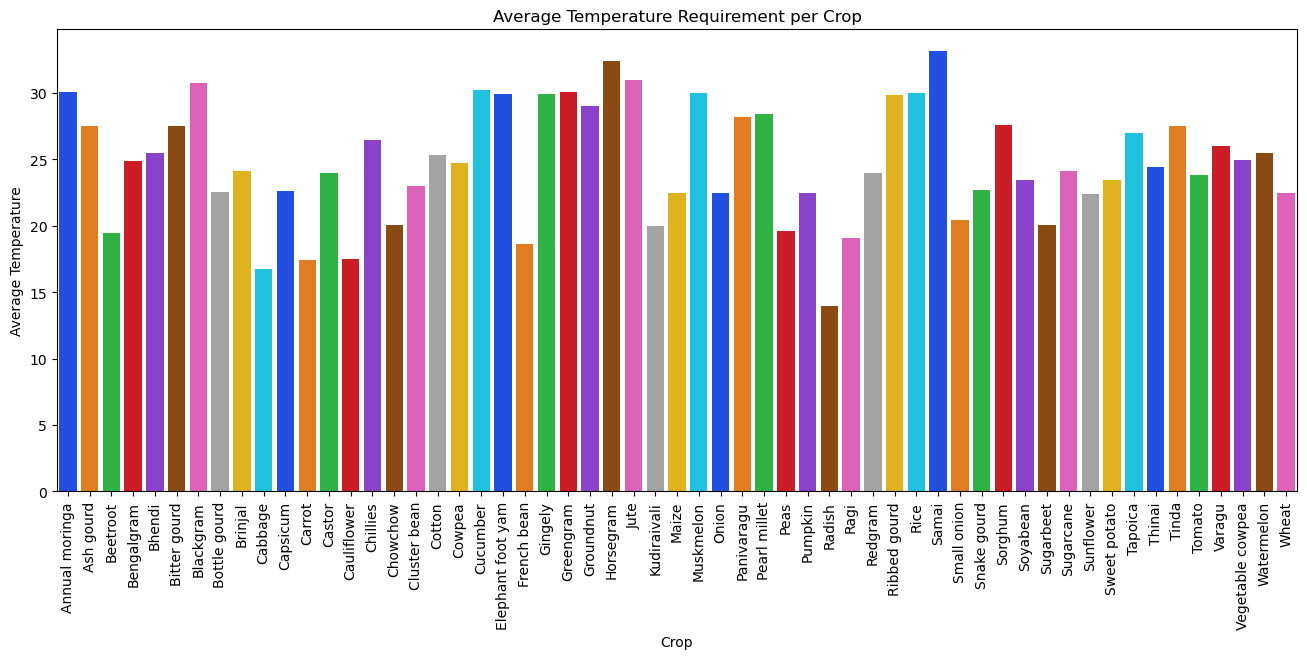

In [45]:
avg_temp = df.groupby("CROPS")["TEMP"].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_temp.index, y=avg_temp.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Temperature Requirement per Crop")
plt.ylabel("Average Temperature")
plt.xlabel("Crop")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\3303809605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_N.index, y=avg_N.values, palette="bright")


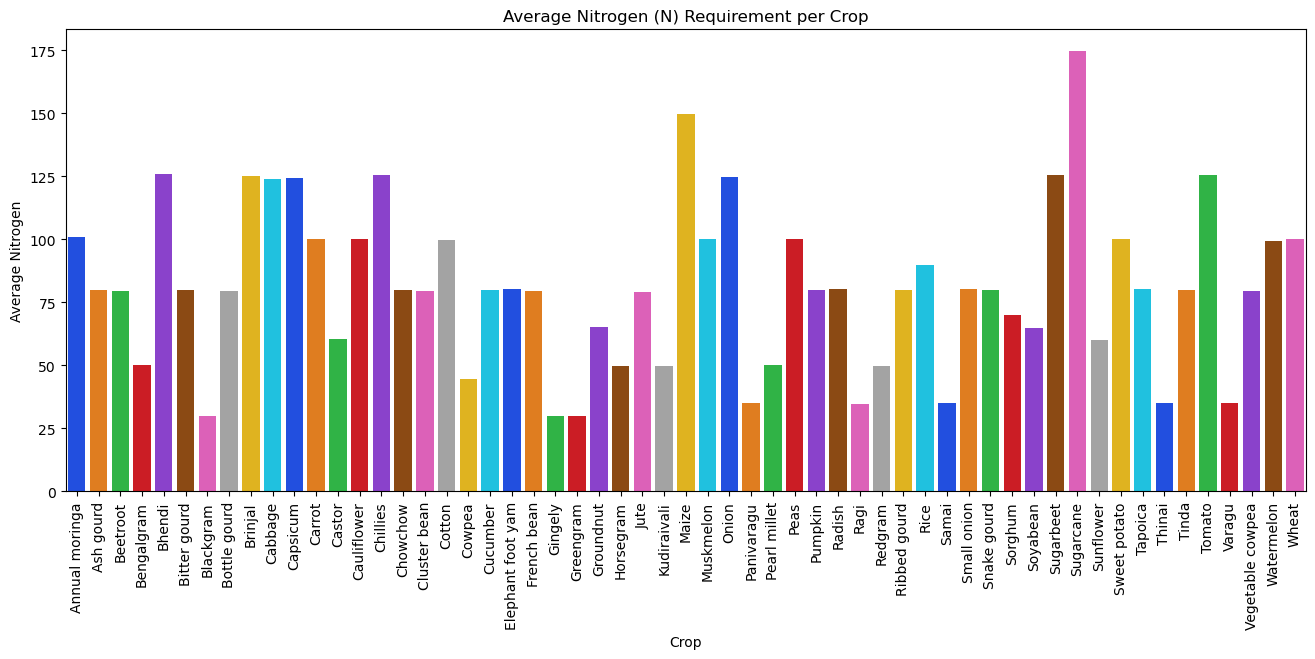

In [46]:
avg_N = df.groupby("CROPS")["N"].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_N.index, y=avg_N.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Nitrogen (N) Requirement per Crop")
plt.ylabel("Average Nitrogen")
plt.xlabel("Crop")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\2643632108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.WATER_SOURCE, order=df.WATER_SOURCE.value_counts().index, palette="bright")


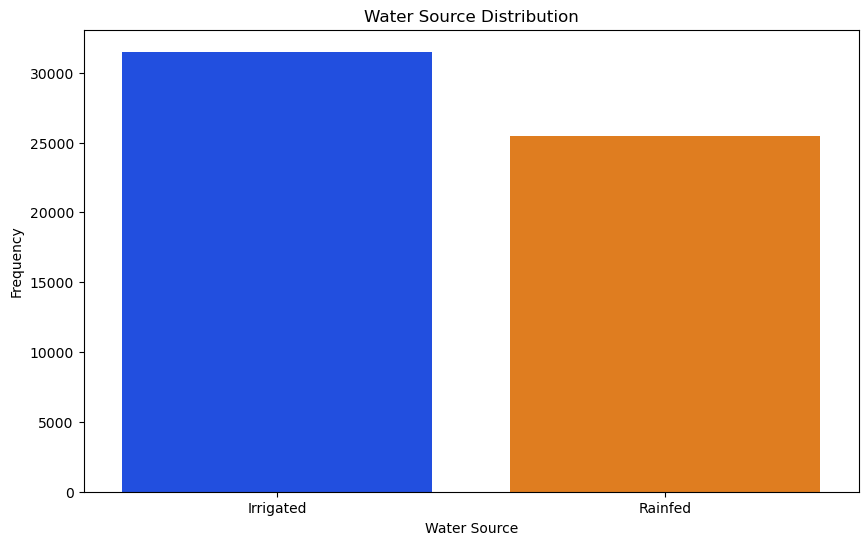

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.WATER_SOURCE, order=df.WATER_SOURCE.value_counts().index, palette="bright")
plt.title("Water Source Distribution")
plt.xlabel("Water Source")
plt.ylabel("Frequency")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\426333410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_K.index, y=avg_K.values, palette="bright")


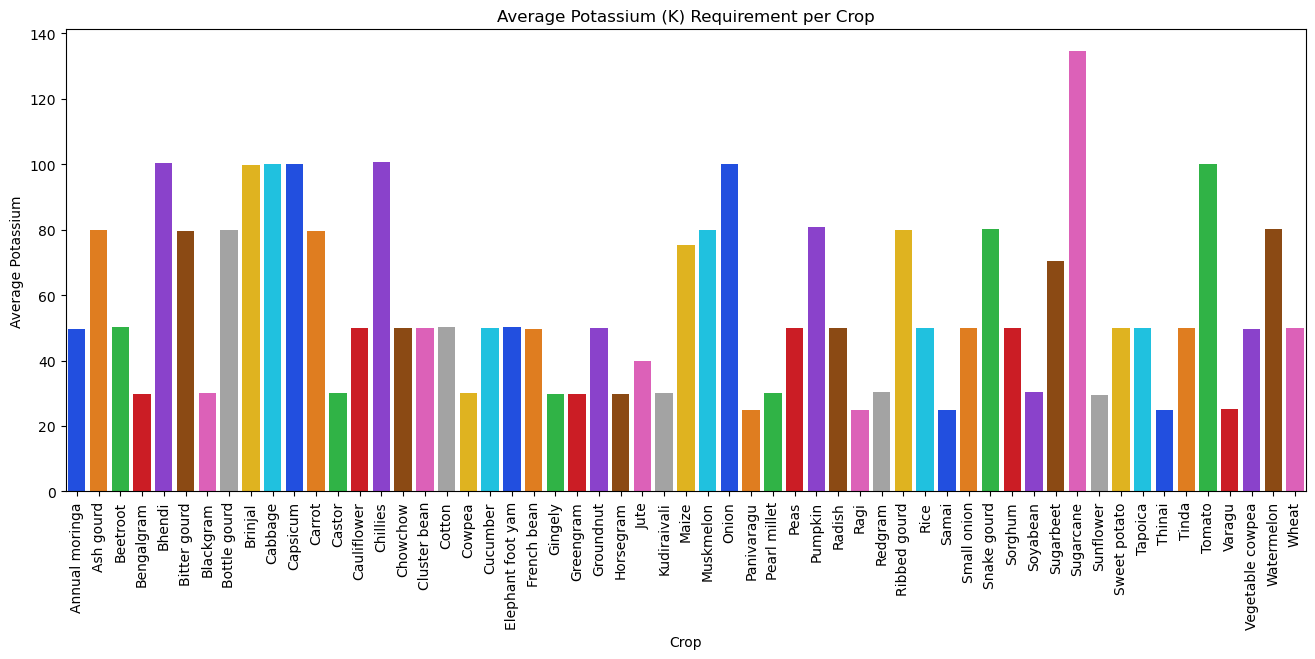

In [48]:
avg_K = df.groupby("CROPS")["K"].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_K.index, y=avg_K.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Potassium (K) Requirement per Crop")
plt.ylabel("Average Potassium")
plt.xlabel("Crop")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\3020903285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_P.index, y=avg_P.values, palette="bright")


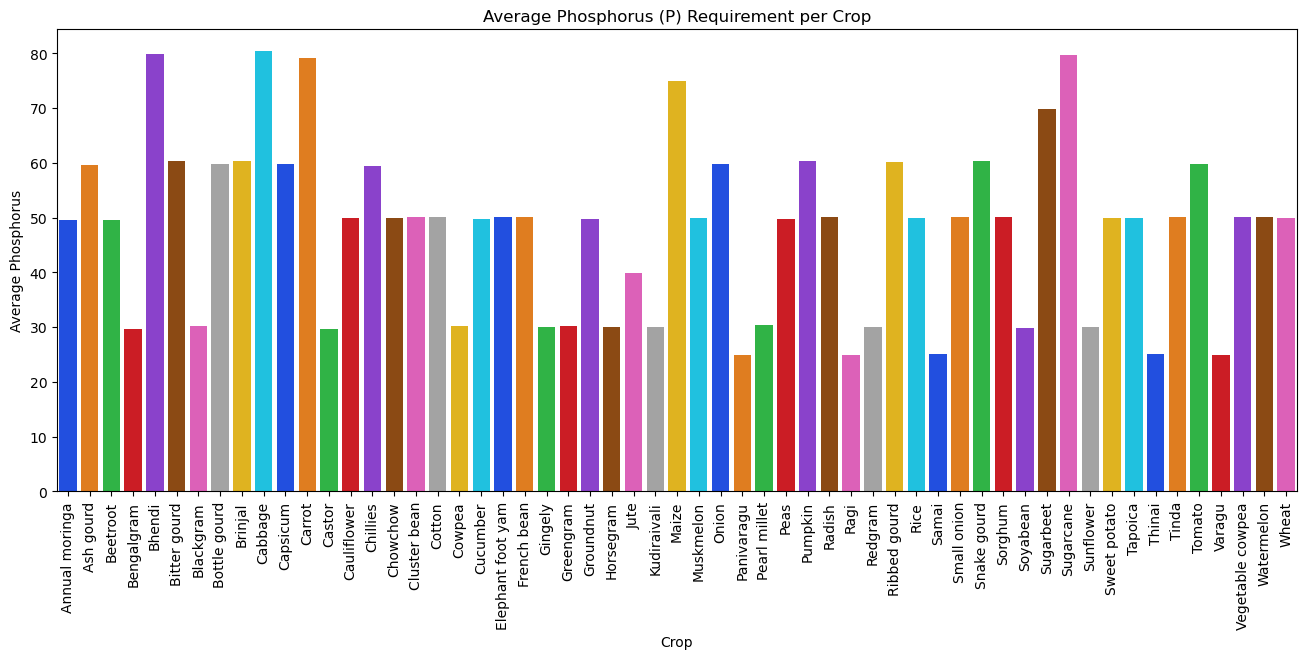

In [49]:
avg_P = df.groupby("CROPS")["P"].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_P.index, y=avg_P.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Phosphorus (P) Requirement per Crop")
plt.ylabel("Average Phosphorus")
plt.xlabel("Crop")
plt.show()

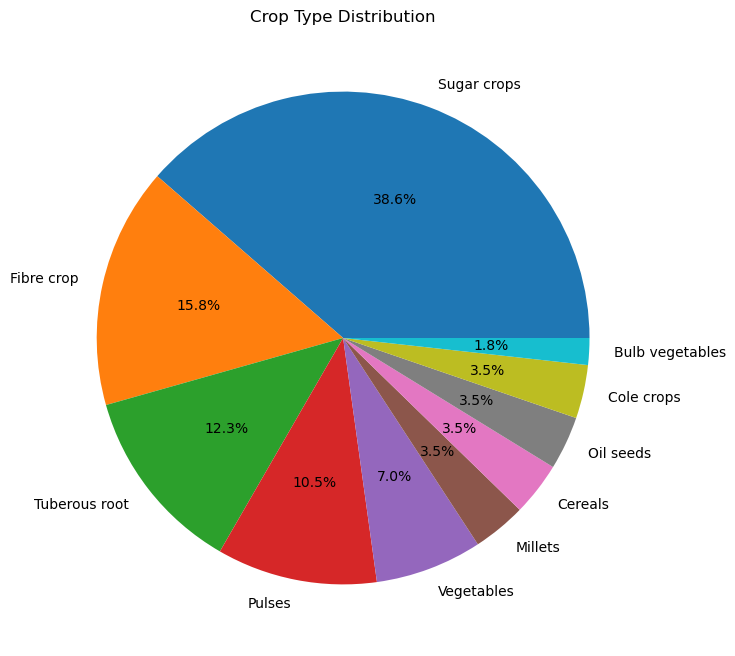

In [50]:
plt.figure(figsize=(10,8))
plt.pie(df.TYPE_OF_CROP.value_counts(), labels=df.TYPE_OF_CROP.unique(), autopct="%1.1f%%", startangle=0)
plt.title("Crop Type Distribution")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\549754647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_water.index, y=avg_water.values, palette="bright")


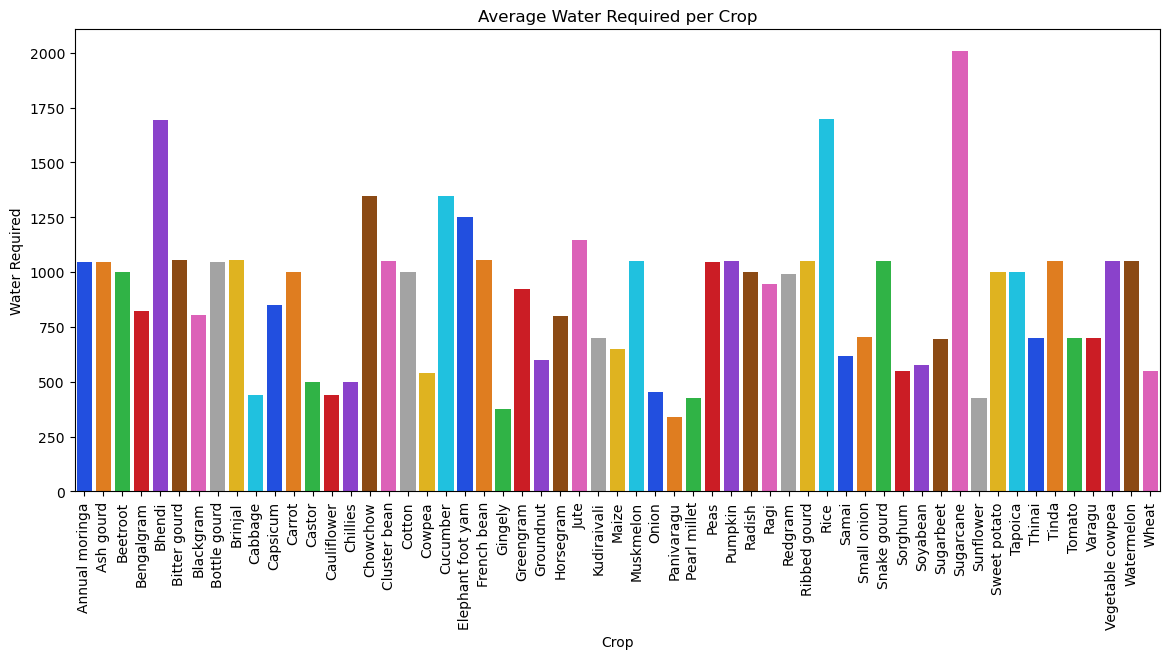

In [51]:
avg_water = df.groupby("CROPS")["WATERREQUIRED"].mean()

plt.figure(figsize=(14,6))
sns.barplot(x=avg_water.index, y=avg_water.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Water Required per Crop")
plt.ylabel("Water Required")
plt.xlabel("Crop")
plt.show()

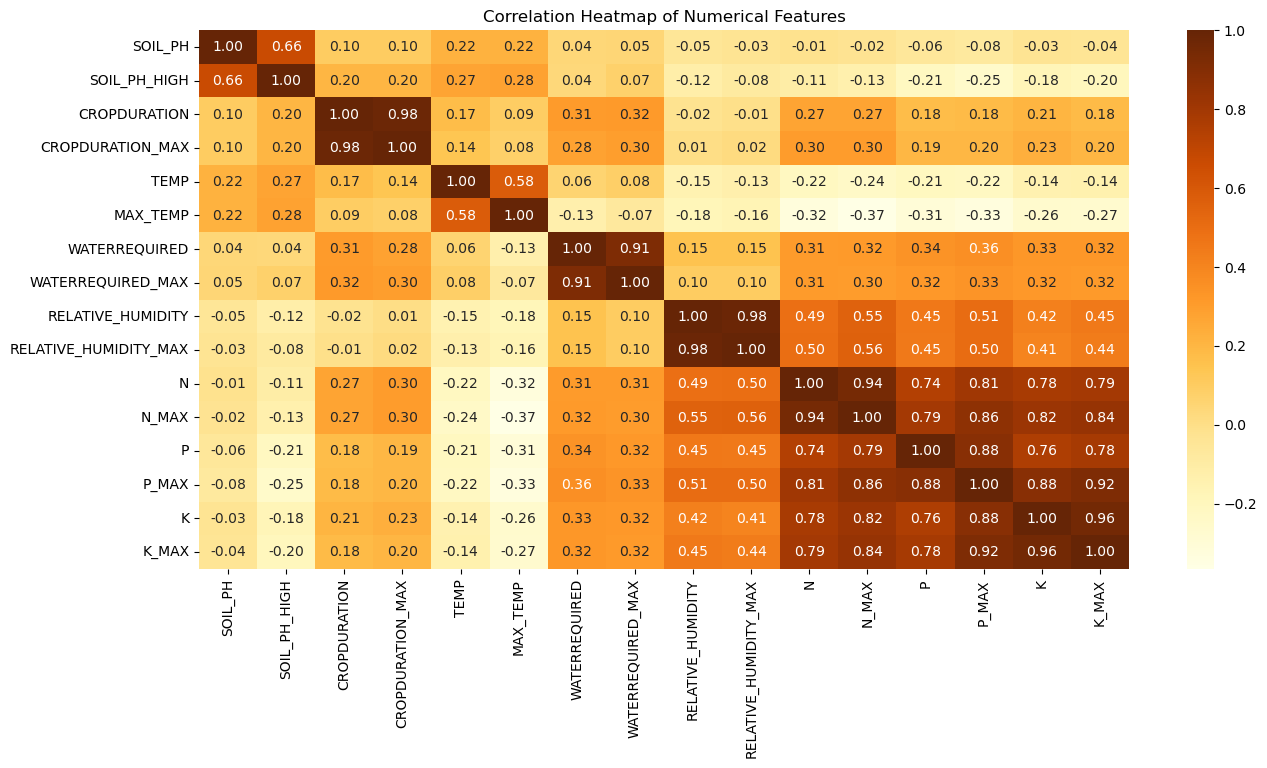

In [52]:
num_cols = []
for col in df.select_dtypes(include=["int64","float64"]).columns:
  num_cols.append(col)

plt.figure(figsize=(15,7))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="YlOrBr")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()